# Atlanta Crime - Unsupervised Learning

## Description

In this part of the project, we will use unsupervised learning algorithms, namely, DBSCAN, K-Means, and Mean Shift clustering algorithms to analyze the Atlanta Crime dataset. Clustering based on both location and time will provide us more insights about the dataset that will be useful in understanding the data prior to building our predictive models with supervised learning algorithms

[DBSCAN Method 2](#method2)

## Import Libraries

In [2]:
import sklearn as sk
from sklearn import cluster
from sklearn import neighbors
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

In [3]:
# Packages for geospatial analysis
# Link: https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

## Load Data

In [24]:
# 2019
data = pd.read_csv("cobra-clean2009.csv", sep=',', header=0, engine='python', usecols = lambda column : column in ["Occur Time", "UCR #"])
# Cleaned 2009-2018
#data = pd.read_csv("cobra-clean.csv", sep=',', header=0, engine='python', usecols = lambda column : column in ["Latitude", "Longitude"])
X = data.to_numpy()
head_tail = data.iloc[np.r_[0:10, -10:0]]
head_tail

,Occur Time,UCR #
0,1145,630
1,1330,630
2,1450,630
3,1600,630
4,1645,630
5,1740,630
6,1627,630
7,815,630
8,100,640
9,130,640


In [7]:
# Geo spatial
df = pd.read_csv('COBRA-2019.csv')
coords = df.as_matrix(columns=['Latitude', 'Longitude'])

FileNotFoundError: [Errno 2] File b'COBRA-2019.csv' does not exist: b'COBRA-2019.csv'

## Plot DBSCAN Function

In [15]:
def plot_dbscan(labels):
    #colors = ['y', 'b', 'g', 'r']
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors): 
        if k == -1: 
            # Black used for noise. 
            col = 'k'
        class_member_mask = (labels == k) 

        xy = X[class_member_mask & core_samples_mask] 
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                          markeredgecolor='k',  
                                          markersize=6) 

        xy = X[class_member_mask & ~core_samples_mask] 
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                          markeredgecolor='k', 
                                          markersize=6) 
  
    plt.title('number of clusters: %d' %n_clusters) 
    #plt.ylim(bottom = -84.6, top = -84.25)
    #plt.xlim(left = 33.62, right = 33.9)
    plt.show() 

## K-Distance Plot (Elbow Method)

k-distance plot for k= 3
nbrs NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)
--------------------------------------------------------------


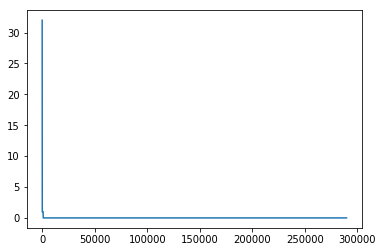

--------------------------------------------------------------
k-distance plot for k= 5
nbrs NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)
--------------------------------------------------------------


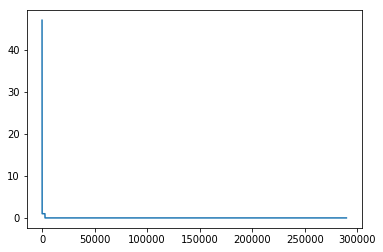

--------------------------------------------------------------
k-distance plot for k= 10
nbrs NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)
--------------------------------------------------------------


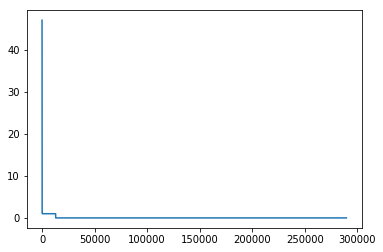

--------------------------------------------------------------
k-distance plot for k= 15
nbrs NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                 radius=1.0)
--------------------------------------------------------------


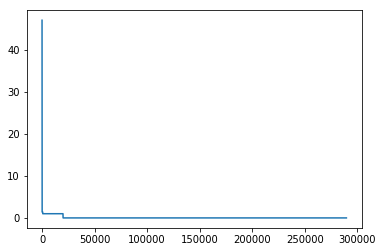

--------------------------------------------------------------
k-distance plot for k= 25
nbrs NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                 radius=1.0)
--------------------------------------------------------------


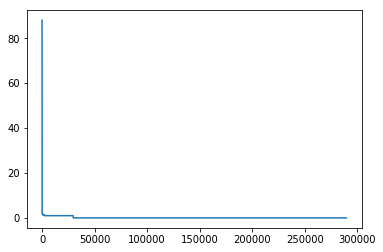

--------------------------------------------------------------
k-distance plot for k= 50
nbrs NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                 radius=1.0)
--------------------------------------------------------------


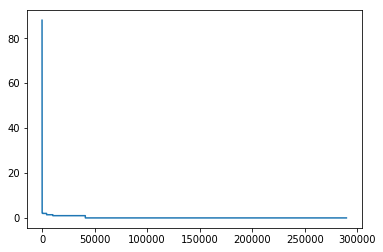

--------------------------------------------------------------
k-distance plot for k= 100
nbrs NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                 radius=1.0)
--------------------------------------------------------------


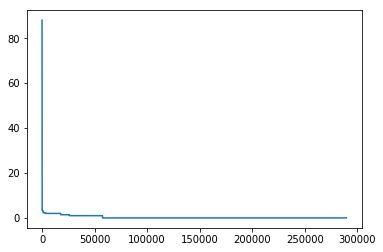

--------------------------------------------------------------


In [21]:
min_samples_array = np.array([3,5,10,15,25,50,100])
#min_samples_array = np.array([2,3,4,5,15,30,75])
for k in min_samples_array:
    nbrs = neighbors.NearestNeighbors(k).fit(X)
    distances, indices = nbrs.kneighbors(X)
    k_distances = distances[:,-1]
    k_distances = -np.sort((-k_distances))
    points = np.arange(distances.shape[0])
    
    print('k-distance plot for k=',k)
    print('nbrs', nbrs)
    
    print('--------------------------------------------------------------')
    plt.plot(points,k_distances)
    plt.show()
    print('--------------------------------------------------------------')

## Compute DBSCAN

DBSCAN for Eps = 0.002 and min_samples = [3.0]
--------------------------------------------------------------
Number of Clusters:  4058
Number of Noise Points:  904
Labels:  [   0    1    2 ... 1655   23  240]


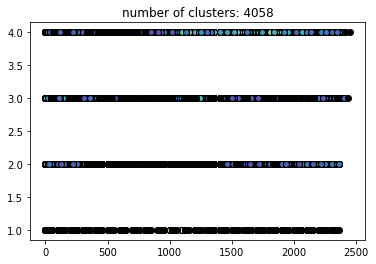

--------------------------------------------------------------
DBSCAN for Eps = 0.003 and min_samples = [5.0]
--------------------------------------------------------------
Number of Clusters:  3534
Number of Noise Points:  2751
Labels:  [   0    1    2 ... 1585   23  237]


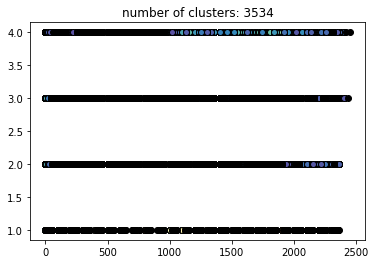

--------------------------------------------------------------


KeyboardInterrupt: 

In [22]:
#Parameters are in form of tuples where the first value is eps
#and the second value is min_samples i.e: (eps,min_samples)

#params before 18,000 points were eliminated
#params_array = np.array([(0.002,3),(0.0025,5),(0.004,10),(0.005,15),(0.006,20),(0.007,50),(0.010,100)])

#params after 18,000 points were eliminated 
params_array = np.array([(0.002,3),(0.003,5),(0.004,10),(0.005,15),(0.007,20),(0.009,50),(0.011,100)])
for params in params_array:
    db = sk.cluster.DBSCAN(params[0], params[1]).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print('DBSCAN for Eps =',params[0],'and min_samples =',[params[1]])
    print('--------------------------------------------------------------')
    print('Number of Clusters: ',n_clusters)
    print('Number of Noise Points: ',n_noise)
    print('Labels: ',labels)
    #print('Unique Labels: ',np.unique(labels))
    plot_dbscan(labels)
    print('--------------------------------------------------------------')

## DBSCAN Method 2 (spatial representation)
<a id='method2'></a>

In [9]:
# DBSCAN algo with radians

kms_per_radian = 6371.0088
epsilon = 0.5 / kms_per_radian
db = sk.cluster.DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 49


In [180]:
import random
# hex_number = str(hex(random_number))
# hex_number = '#' + hex_number[2:]
# print('A Random Hex Color Code is :', hex_number)
randomNums = [random.randint(0, 255) for i in range(3 * num_clusters)]
hexes = [hex(r)[2:] if len(hex(r)[2:]) == 2 else '0' + hex(r)[2:] for r in randomNums]
# print(hexes)
cluster_colors = ['#' + ''.join([hexes[j] for j in range(3 * i, 3 * i + 3)]) for i in range(num_clusters)]
# cluster_colors = ['#' + ''.join([hex(random.randint(0, 255))[2:] for i in range(3)]) for j in range(num_clusters)]
# print(cluster_colors, len(cluster_colors))

In [10]:
## Finding center-most point of clusters

def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)

In [11]:
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'Longitude':lons, 'Latitude':lats})

In [12]:
#rs = rep_points.apply(lambda row: df[(df['Latitude']==row['Latitude']) &amp;&amp; (df['Longitude']==row['Longitude'])].iloc[0], axis=1)
rs = rep_points.apply(lambda row: df[(df['Latitude']==row['Latitude']) & (df['Longitude']==row['Longitude'])].iloc[0], axis=1)

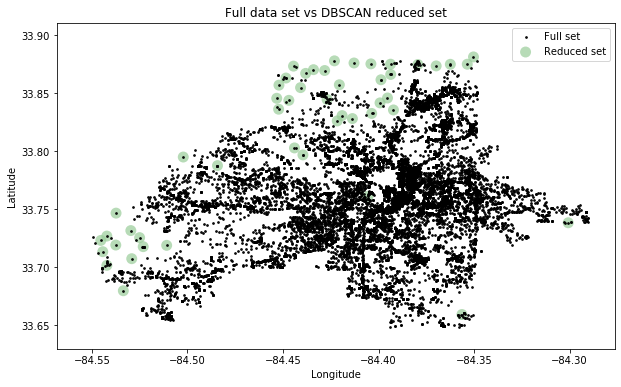

In [13]:
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['Longitude'], rs['Latitude'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
df_scatter = ax.scatter(df['Longitude'], df['Latitude'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

In [14]:
fig, ax = plt.subplots(figsize=[10, 6])
# df_scatter = ax.scatter(df['Longitude'], df['Latitude'], c='k', alpha=0.9, s=3)
#     for x in range(len(cluster_labels)):
#         if cluster_labels[x] == i:
c_by_ind = [[] for i in range(num_clusters)]
for x in range(len(cluster_labels)):
    c_by_ind[cluster_labels[x]].append(x)
for i in range(num_clusters):
    rs_scatter = ax.scatter(rs['Longitude'][i], rs['Latitude'][i], c=cluster_colors[i], edgecolor='None', alpha=0.7, s=120)
    for e in c_by_ind[i]:
        df_scatter = ax.scatter(df['Longitude'][e], df['Latitude'][e], c=cluster_colors[i], alpha=0.9, s=3)
#     for x in range(len(cluster_labels)):
#         if cluster_labels[x] == i:
#             df_scatter = ax.scatter(df['Longitude'][e], df['Latitude'][e], c=cluster_color_assigns[i], alpha=0.9, s=3)
#     for point in clusters[i]:
#         indexNames = [x for x in df[df['Longitude'] == point[1]].index if x in df[df['Latitude'] == point[0]].index]
#         for e in indexNames:
#             df_scatter = ax.scatter(df['Longitude'][e], df['Latitude'][e], c=cluster_color_assigns[i], alpha=0.9, s=3)
#     df_scatter = ax.scatter(clusters[i], clusters[i], c=cluster_color_assigns[i], alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

In [15]:
fig, ax = plt.subplots(figsize=[10, 6])
# df_scatter = ax.scatter(df['Longitude'], df['Latitude'], c='k', alpha=0.9, s=3)
#     for x in range(len(cluster_labels)):
#         if cluster_labels[x] == i:
for i in range(num_clusters):
    for e in c_by_ind[i]:
        df_scatter = ax.scatter(df['Longitude'][e], df['Latitude'][e], c=cluster_colors[i], alpha=0.9, s=3)
rs_scatter = ax.scatter(rs['Longitude'], rs['Latitude'], c="k", edgecolor='None', alpha=0.7, s=16)
#     for x in range(len(cluster_labels)):
#         if cluster_labels[x] == i:
#             df_scatter = ax.scatter(df['Longitude'][e], df['Latitude'][e], c=cluster_color_assigns[i], alpha=0.9, s=3)
#     for point in clusters[i]:
#         indexNames = [x for x in df[df['Longitude'] == point[1]].index if x in df[df['Latitude'] == point[0]].index]
#         for e in indexNames:
#             df_scatter = ax.scatter(df['Longitude'][e], df['Latitude'][e], c=cluster_color_assigns[i], alpha=0.9, s=3)
#     df_scatter = ax.scatter(clusters[i], clusters[i], c=cluster_color_assigns[i], alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

## Compute Mean Shift

Bandwidth = 22.442746955438796
Labels:  [ 23  17   6 ...   2 121  52]
Unique Labels:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 2

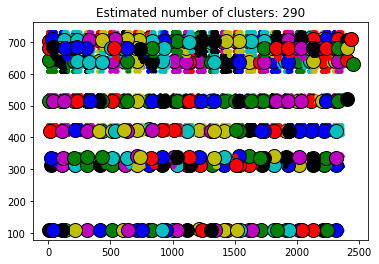

In [25]:
#Parameter
bandwidth = sk.cluster.estimate_bandwidth(X, quantile=0.005, n_samples=1000)

ms = sk.cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters = len(labels_unique)
print('Bandwidth =',bandwidth)
print('Labels: ',labels)
print('Unique Labels: ',np.unique(labels))
print('Cluster Centers: ',cluster_centers)
print("number of estimated clusters : %d" % n_clusters)

# Plot result
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()

## Compute KMeans

Number of Clusters =  3
--------------------------------------------------------------
Cluster Centers:  [[1959.88946245  599.45366083]
 [1163.55052773  598.39140431]
 [ 231.2763755   575.49333522]]
Labels:  [1 1 1 ... 0 2 1]
Unique Labels:  [0 1 2]
--------------------------------------------------------------
Number of Clusters =  10
--------------------------------------------------------------
Cluster Centers:  [[2024.66788893  647.47292215]
 [1209.92283102  607.84749548]
 [  92.01156917  581.15916572]
 [ 871.6389885   593.3351176 ]
 [2131.34832077  375.92378341]
 [1795.14456471  623.10362516]
 [1529.39084553  436.66871682]
 [2256.79025579  646.31171394]
 [1519.71684885  656.8335511 ]
 [ 458.68237131  567.40022615]]
Labels:  [1 1 8 ... 7 9 1]
Unique Labels:  [0 1 2 3 4 5 6 7 8 9]
--------------------------------------------------------------


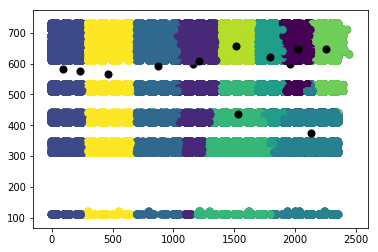

In [26]:
k_values = np.array([3,10])
for k in k_values:
    km = sk.cluster.KMeans(n_clusters = k, init='random',n_init=1,max_iter=300,tol=1e-04,random_state=0)
    y_km = km.fit_predict(X)

    centers = km.cluster_centers_
    labels = km.labels_
    inertia = km.inertia_
    print('Number of Clusters = ',k)
    print('--------------------------------------------------------------')
    print('Cluster Centers: ',centers)
    print('Labels: ',labels)
    print('Unique Labels: ',np.unique(labels))
    plt.scatter(X[:, 0], X[:, 1], c=y_km, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=1);
    print('--------------------------------------------------------------')

## K Means Elbow Method

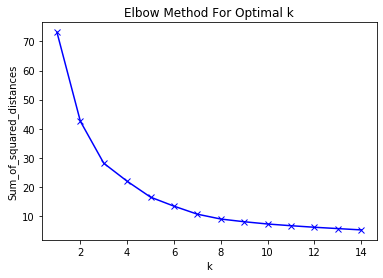

In [47]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = sk.cluster.KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()